In [58]:
# Carga del conjunto de datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. CARGA de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# 2. LIMPIEZA DE COLUMNAS (se quita las comillas si existen)
df.columns = df.columns.str.replace('"', '')

# 3. SEPARACIÓN DE VARIABLES
# Ahora 'df' es definitivamente un DataFrame de Pandas
X = df.drop('quality', axis=1)
y = df['quality']

# 4. DIVISIÓN Y ESCALADO (Vital para KNN)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("¡Éxito! Variables separadas y datos escalados.")
print(f"Forma de X_train: {X_train_scaled.shape}")


¡Éxito! Variables separadas y datos escalados.
Forma de X_train: (1279, 11)


In [51]:
# Entrenar el Modelo KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
# Evaluación del modelo

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.546875

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  0  4  6  0  0]
 [ 0  2 88 40  0  0]
 [ 1  0 49 72 10  0]
 [ 0  0  7 20 15  0]
 [ 0  0  1  1  3  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.68      0.63       130
           6       0.51      0.55      0.53       132
           7       0.54      0.36      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.52      0.55      0.53       320



c:\Users\Milena Torres\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Milena Torres\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Milena Torres\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [53]:
# Optimizar el K 

import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)



In [64]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [65]:
y_pred = model.predict(X_test)
y_pred

array([5.6, 5.2, 6.4, 5.6, 6.2, 5.6, 5.2, 5.4, 5.4, 5.4, 6.8, 4.8, 6.2,
       6. , 5.8, 6.6, 5.4, 5.6, 6.4, 5.6, 5.2, 5.6, 6. , 6.2, 5.8, 6. ,
       5.8, 5.4, 5. , 6. , 5. , 5.2, 5. , 5.4, 5.8, 5. , 6.2, 5.6, 5.8,
       5.6, 5.8, 5. , 5.6, 5. , 5.8, 5.4, 6.4, 6. , 5. , 5.4, 5. , 5.4,
       5. , 6.4, 5. , 5.2, 6.2, 6. , 6. , 5.6, 5.6, 6.4, 5.6, 5.4, 5.6,
       5.8, 6.2, 5.4, 5.8, 5.6, 5.8, 5. , 5.8, 5.2, 6.2, 5.2, 5.2, 5.2,
       5.2, 5.4, 5.2, 6. , 6.2, 5.2, 5.8, 5.4, 5.4, 5.6, 6. , 5.2, 5.8,
       5.2, 5. , 5.4, 5. , 5.6, 5.6, 6. , 5.4, 5.4, 5.2, 5. , 5.8, 6. ,
       6. , 6. , 5.6, 5.6, 5.2, 5.2, 6.2, 5.4, 6.6, 5. , 6.4, 6. , 6. ,
       5.4, 5. , 6.4, 5.2, 5.2, 5.8, 5.2, 5.2, 5.8, 5.6, 5.6, 5.2, 6. ,
       5.8, 5.6, 5.4, 6.4, 5.4, 5.8, 5.4, 5.4, 5.6, 5.8, 6. , 5.2, 6.4,
       5.4, 5.4, 5.2, 6. , 6.4, 5.4, 5. , 5.4, 6.2, 5.6, 5.4, 5.8, 5.8,
       5.2, 6. , 5.8, 6. , 5.8, 5.6, 5.4, 5.2, 5.6, 5.6, 5.4, 5.6, 5.4,
       5. , 5.4, 5. , 6.4, 5.8, 5.6, 6. , 5.4, 5.2, 5.2, 6.2, 5.

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.5319999999999999
Coefficient of determination: 0.18592925775938085


In [67]:
# Guardar el modelo
dump(model, open("knn_regressor_default.sav", "wb"))

NameError: name 'dump' is not defined

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.shape

(1599, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [44]:
df=df.duplicated().sum()

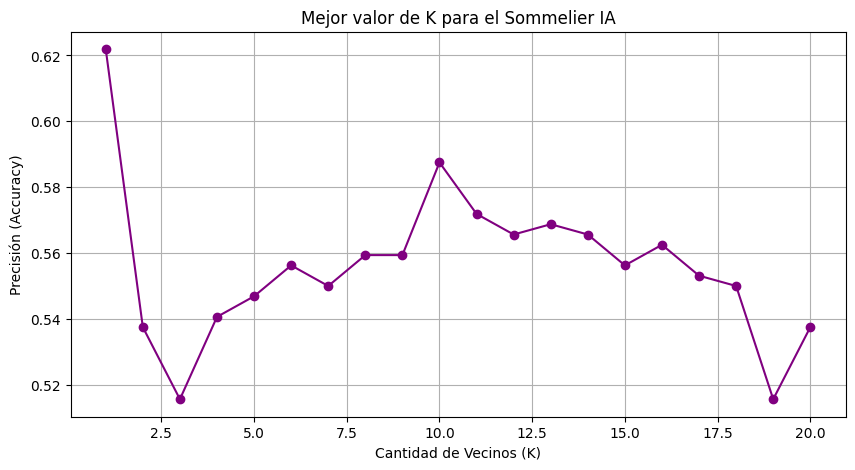

In [46]:
import matplotlib.pyplot as plt

# Probar valores de k del 1 al 20
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(knn.score(X_test_scaled, y_test))

# Graficar para elegir el mejor K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', color='purple')
plt.title('Mejor valor de K para el Sommelier IA')
plt.xlabel('Cantidad de Vecinos (K)')
plt.ylabel('Precisión (Accuracy)')
plt.grid(True)
plt.show()

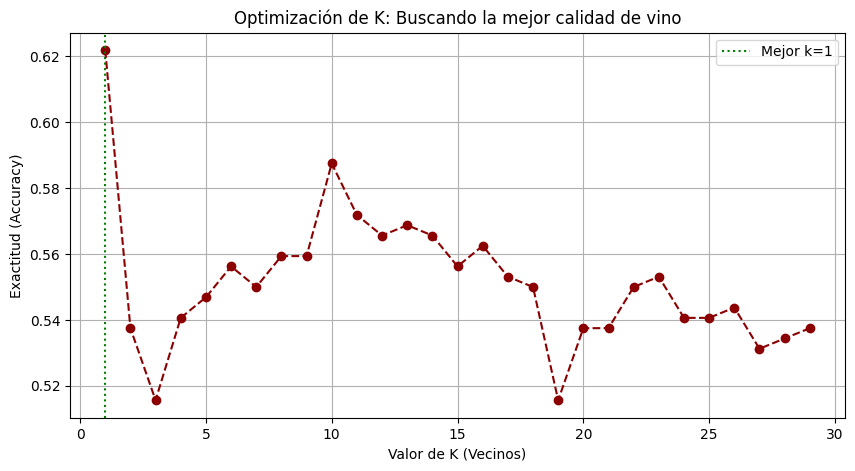

Mejor valor de k: 1 con una precisión de: 0.6219


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Probar diferentes valores de k
k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(knn.score(X_test_scaled, y_test))

# Encontrar el mejor k y su precisión
best_k = k_values[np.argmax(accuracies)]
max_acc = max(accuracies)

# Graficar Accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='darkred')
plt.axvline(best_k, color='green', linestyle=':', label=f'Mejor k={best_k}')
plt.title('Optimización de K: Buscando la mejor calidad de vino')
plt.xlabel('Valor de K (Vecinos)')
plt.ylabel('Exactitud (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor valor de k: {best_k} con una precisión de: {max_acc:.4f}")

In [ ]:
# se entrena con el mejor k encontrado
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

# Reporte de rendimiento
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("--- EVALUACIÓN FINAL DEL SOMMELIER IA ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

--- EVALUACIÓN FINAL DEL SOMMELIER IA ---
Accuracy Score: 0.6219

Matriz de Confusión:
[[ 0  0  0  1  0  0]
 [ 2  1  1  6  0  0]
 [ 1  4 87 35  3  0]
 [ 0  1 31 86 13  1]
 [ 0  0  2 14 25  1]
 [ 0  0  0  2  3  0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.72      0.67      0.69       130
           6       0.60      0.65      0.62       132
           7       0.57      0.60      0.58        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.62      0.62      0.62       320

